# Assignment 1 (part I): Line Fitting

## Problem 1
### Prove that affine transformations preserve parallel lines.

Solution: 
Parallel lines are lines which do not meet in an affine plane.
Since affine transformation preserves incidences and planes, the transformed images lie in an affine plane and do not meet. Hence, parallelism is preserved.

Following is a more elaborated proof:

Suppose we have 2 parallel lines, $l:\vec{p} + k\vec{u}$ and $j: \vec{q} + k\vec{v}, k \in \Re$. Then $\vec{v} = t\vec{u}$ for some $t \in \Re $. 

Let $f(\vec{x}) = \textbf{A}\vec{x} + \vec{b}$ be an affine transformation.

Applying affine transformation,
  
   We know that affine transformation maps a line to a line. Hence using line $l$ above, then for every $k \in \Re$,
   
$\begin{aligned} f(\vec{p}+ k\vec{u}) &= \textbf{A}(\vec{p} + k\vec{u}) + \vec{b} \\ &=  (\textbf{A}\vec{p} + \vec{b}) + k(\textbf{A}\vec{u}) \\ &= \vec{p} _{1} + k\vec{u}_{1}\end{aligned}$ 

where $\vec{p} _{1} + k\vec{u}_{1}$ is a new line.
    
$\begin{aligned} f(\vec{q}+ k\vec{v}) &= f(\vec{q}+ k(t\vec{u})) \\ &= \textbf{A}(\vec{q} + k(t\vec{u})) + \vec{b} \\ &= (\textbf{A}\vec{q} + \vec{b}) + k(\textbf{A}t\vec{u}) \\ &= \vec{q} _{1} + k(t\vec{u}_{1}) \end{aligned}$

where $\vec{q} _{1} + k(t\vec{u}_{1})$ is a new line.

We see that $\vec{p} _{1} + k\vec{u}_{1}$ and $\vec{q} _{1} + k(t\vec{u}_{1})$ remain parallel lines after affine transformation. Thus, affine transformations preserve parallel lines.
    

## Problem 2 (least-squares)
### Complete implementation of function $estimate$ of class $LeastSquareLine$ below. It should update line parameters $a$ and $b$ correpsonding to line model $y=ax+b$. You can use either SVD of matrix $A$ or inverse of matrix $A^T A$, as discussed in class. NOTE: several cells below test your code.

In [1]:
%matplotlib notebook

import numpy as np
import numpy.linalg as la
import matplotlib
import matplotlib.pyplot as plt
from skimage.measure import ransac

In [2]:
class LeastSquareLine:

    def __init__(self):
        self.a = 0.0
        self.b = 0.0
        
    def estimate(self, points2D):
        # contains 1D of X'
        B = points2D[:,1]
        A = np.copy(points2D)
        # contains 2D of X and 1s
        A[:,1] = 1.0 
        print 'A', A
        # Vector B and matrix A are already defined. Change code below
       # self.a = 0.0
        #self.b = 0.0
        transposeA  = np.matrix.transpose(A)
        transposeAA = np.matmul(transposeA, A)
        invTAA =np.linalg.inv(transposeAA)
        x = np.matmul(np.matmul(invTAA, transposeA), B)
        self.a = x[0]
        print self.a
        self.b = x[1]
        print self.b
      
        ##### Second method: SVD of matrix A
        # U, sigma, VT = la.svd(A)
        # Sigma = np.zeros(A.shape)
        # Sigma[:2,:2] = np.diag(sigma)
        # (U.dot(Sigma).dot(VT) - A).round(4)
        # Sigma_pinv = np.zeros(A.shape).T
        # Sigma_pinv[:2,:2] = np.diag(1/sigma[:2])
        # Sigma_pinv.round(3)
        # x_svd = VT.T.dot(Sigma_pinv).dot(U.T).dot(B)
        # la.norm(A.dot(x_svd)-B, 2)
        # la.norm(x_svd)
        # self.a = x_svd[0]
        # print self.a
        # self.b = x_svd[1]
        # print self.b
        
        return True
        
    def predict(self, x): return (self.a * x) + self.b
    
    def predict_y(self, x): return (self.a * x) + self.b
            
    def residuals(self, points2D):      
        return points2D[:,1] - self.predict(points2D[:,0])
    
    def line_par(self):
        return self.a, self.b
    
##### For checking:
#tryA = LeastSquareLine()
#a = np.array([[0, 4], [2, 3] , [5,3], [4,5]])
# tryA.estimate(a)
# print 'residuals', tryA.residuals(a)


## Problem 3 (RANSAC for robust line fitting, single model)

#### Working code below generates a noisy cloud of points in ${\cal R}^2$ from a given line and a group of outliers.

<IPython.core.display.Javascript object>


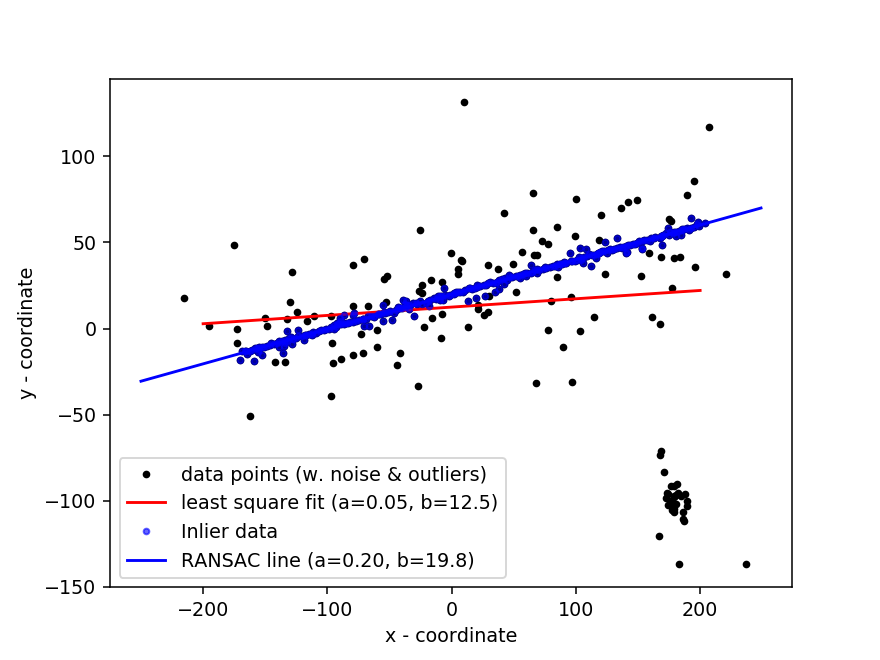

In [3]:
np.random.seed(seed=1)

# parameters for "true" line y = a*x + b
a, b = 0.2, 20.0

# x-range of points [x1,x2]
x_start, x_end = -200.0, 200.0

# generate the "true" line points
x = np.arange(x_start,x_end)
y = a * x + b               
data = np.column_stack([x, y])    # staking data points into (Nx2) array

# add faulty data (i.e. outliers)
faulty = np.array(30 * [(180., -100)])  # (30x2) array containing 30 rows [180,-100]  (points)
faulty += 5 * np.random.normal(size=faulty.shape)  # adding Gaussian noise to these points
data[:faulty.shape[0]] = faulty   # replacing the first 30 points in data with faulty (outliers)

# add gaussian noise to coordinates
noise = np.random.normal(size=data.shape) # generating Gaussian noise (variance 1) for each data point (rows in 'data')
data += 0.5 * noise
data[::2] += 5 * noise[::2]  # every second point adds noise with variance 5
data[::4] += 20 * noise[::4] # every fourth point adds noise with variance 20

fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1], '.k', label='data points (w. noise & outliers)')
ax.set_xlabel('x - coordinate')
ax.set_ylabel('y - coordinate')
ax.legend(loc='lower left')
plt.show()

#### Code below uses your implementation of class $LeastSquareLine$ for least-square line fitting for the data above. The estimated line is displayed in the cell above. Use this cell to test your code in Problem 2. Of course, your least-square line will be affected by the outliers.

In [4]:
LSline = LeastSquareLine() # uses class implemented in Problem 2
print LSline.estimate(data)
a_ls, b_ls = LSline.line_par()

# visualizing estimated line
ends = np.array([x_start,x_end])
ax.plot(ends, LSline.predict(ends), '-r', label='least square fit (a={:4.2f}, b={:4.1f})'.format(a_ls,b_ls))
ax.legend(loc='lower left')
plt.show()

A [[ 1.68884579e+02  1.00000000e+00]
 [ 1.77615606e+02  1.00000000e+00]
 [ 1.87013888e+02  1.00000000e+00]
 [ 1.89289874e+02  1.00000000e+00]
 [ 2.37327368e+02  1.00000000e+00]
 [ 1.86588483e+02  1.00000000e+00]
 [ 1.79268118e+02  1.00000000e+00]
 [ 1.85826665e+02  1.00000000e+00]
 [ 1.71329657e+02  1.00000000e+00]
 [ 1.80326116e+02  1.00000000e+00]
 [ 1.73274099e+02  1.00000000e+00]
 [ 1.84601234e+02  1.00000000e+00]
 [ 1.89560923e+02  1.00000000e+00]
 [ 1.79050218e+02  1.00000000e+00]
 [ 1.79330577e+02  1.00000000e+00]
 [ 1.77141155e+02  1.00000000e+00]
 [ 1.66994370e+02  1.00000000e+00]
 [ 1.76855517e+02  1.00000000e+00]
 [ 1.72522253e+02  1.00000000e+00]
 [ 1.87989010e+02  1.00000000e+00]
 [ 1.67639044e+02  1.00000000e+00]
 [ 1.76465954e+02  1.00000000e+00]
 [ 1.74232024e+02  1.00000000e+00]
 [ 1.81324856e+02  1.00000000e+00]
 [ 1.73812223e+02  1.00000000e+00]
 [ 1.80814293e+02  1.00000000e+00]
 [ 1.78941293e+02  1.00000000e+00]
 [ 1.79130802e+02  1.00000000e+00]
 [ 1.83208182e+02 

### (part a) Assume that a set of $N=100$ points in $2D$ includes $N_i=20$ inliers for one line and $N_o=80$ outliers. What is the least number of times one should sample a random pair of points from the set to get probability $p\geq 0.95$ that in at least one of the sampled pairs both points are inliers? Derive a general formula and compute a numerical answer for the specified numbers.

Solution: 

Let S be the least number of times one should sample a random pair of points from the set to get probability $p\geq 0.95$. 

Probability of a point being an outlier $= \frac{80}{100} = 0.8 $ 

Probability of choosing 2 inliners (i.e. sampled pair) in a row $ (1 - 0.8)^2$

Probability that 2 points in the sample were outliers = $1 - (1 - 0.8)^2$

Since minimum desired probability that at least one of the sampled pairs are both inliners = 0.95,

$1 - (1 - (1 - 0.8)^2)^S  = 0.95$

$S = \frac {log(1-0.95)}{log(1-(1-0.8)^2)} = 73.38525 = 74$ (round up)

General formula: $S = \frac{log(1-p)}{log(1-(1-o)^n)}$  ,

where S = least number of samples, p = desired probability that at least one of the sampled pairs both points are inliners, o = probability that a point is an outlier, n = number of points in a sample (in this case, 2) 

### (part b) Using the knowledge of the number of inliers/outliers in the example at the beginning of Problem 3, estimate the minimum number of sampled pairs needed to get RANSAC to "succeed" (to get at least one pair of inliers) with $p\geq 0.95$. Use your formula in part (a). Show your numbers in the cell below. Then, use your estimate as a value of parameter $max\text{_}trials$  inside function $ransac$ in the code cell below and test it.  You should also change $residual\text{_}threshold$ according to the noise level for inliers in the example. NOTE: the result is displayed in the same figure at the beginning of Problem 3.

Your estimates: 74

In [5]:
## Residual threshold here will be calculated using median absolute deviation on the noise level to determine inliners which is dependent on the variance of the data points
## Calculate the number of data points with variance = 1, 5 or 20
numOfVar5 = len(data[::2])
numOfVar20 = len(data[::4])
numOfHalfVar = len(data) - numOfVar5 - numOfVar20

## Calculate mean of noise level (in terms of variance)
meanVariance = (numOfVar5 * 5 + numOfVar20 * 20 + numOfHalfVar * 0.5)/len(data)

## MAD of variance
MAD = (numOfVar5 * (abs(5 - meanVariance)) + numOfVar20 * (abs(20 - meanVariance)) + numOfHalfVar * (abs(0.5 - meanVariance)))/len(data)


# robustly fit line using RANSAC algorithm
model_robust, inliers = ransac(data, LeastSquareLine, min_samples=2, residual_threshold=MAD, max_trials=74)
a_rs, b_rs = model_robust.line_par()

# generate coordinates of estimated models
line_x = np.arange(-250, 250)
line_y_robust = model_robust.predict_y(line_x)

#fig, ax = plt.subplots()
ax.plot(data[inliers, 0], data[inliers, 1], '.b', alpha=0.6, label='Inlier data')
ax.plot(line_x, line_y_robust, '-b', label='RANSAC line (a={:4.2f}, b={:4.1f})'.format(a_rs,b_rs))
ax.legend(loc='lower left')
plt.show()

A [[118.57758888   1.        ]
 [189.07079017   1.        ]]
0.37525899867142276
6.713949152638236
A [[-55.07281537   1.        ]
 [-46.74246319   1.        ]]
-0.5307015802823614
-15.597566316737456
A [[104.05236653   1.        ]
 [ 92.05059397   1.        ]]
0.2502480271932952
15.005965110732006
A [[167.63904384   1.        ]
 [136.17443167   1.        ]]
-4.550562993922547
689.6388308694534
A [[116.11293209   1.        ]
 [ 41.76200731   1.        ]]
0.20784338971693805
16.976287934576543
A [[172.52225304   1.        ]
 [135.48311043   1.        ]]
-3.940455608321838
581.2281407581214
A [[-20.84486386   1.        ]
 [ 92.05059397   1.        ]]
0.20628437149077167
19.052845731256564
A [[-170.13539326    1.        ]
 [ 136.17443167    1.        ]]
0.28804786241080615
30.743747442761602
A [[  1.5224972    1.        ]
 [114.75339177   1.        ]]
-0.1198943707948443
20.686796193653258
A [[ 46.3065295    1.        ]
 [220.68750828   1.        ]]
0.003696108809792875
31.078569031804868


## Problem 4 (sequential RANSAC for robust multi-line fitting)

#### Generating noisy data with outliers

<IPython.core.display.Javascript object>


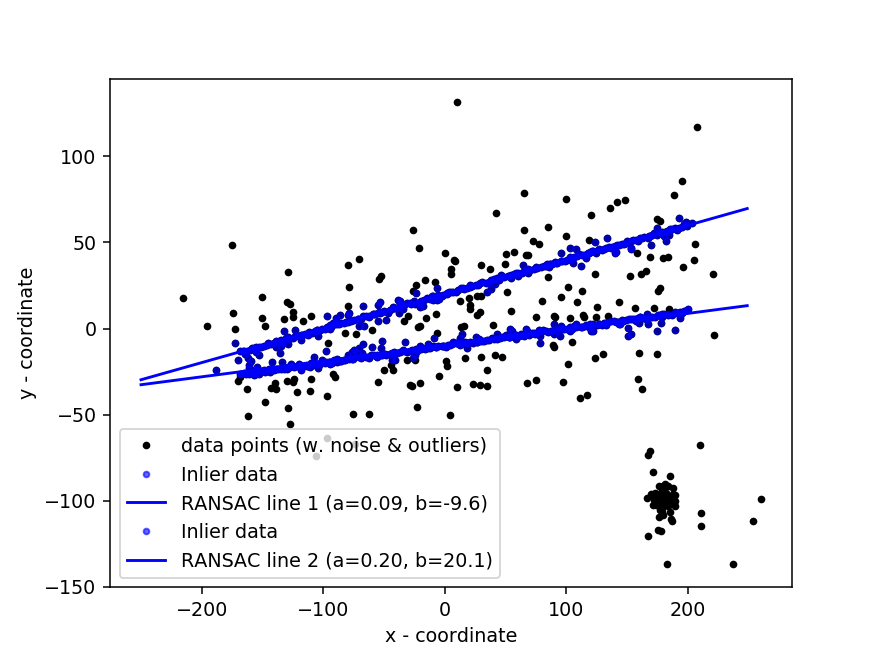

In [6]:
# parameters for "true" lines y = a*x + b
a2, b2 = 0.1, -10.0

# generate the "true" line points
y2 = a2 * x + b2
data2 = np.column_stack([x, y2])    # staking data points into (Nx2) array

# add faulty data (i.e. outliers)
faulty = np.array(30 * [(180., -100)])  # (30x2) array containing 30 rows [180,-100]  (points)
faulty += 5 * np.random.normal(size=faulty.shape)  # adding Gaussian noise to these points
data2[:faulty.shape[0]] = faulty   # replacing the first 30 points in data2 with faulty (outliers)

# add gaussian noise to coordinates
noise = np.random.normal(size=data.shape) # generating Gaussian noise (variance 1) for each data point (rows in 'data')
data2+= 0.5 * noise
data2[::2] += 5 * noise[::2]  # every second point adds noise with variance 5
data2[::4] += 20 * noise[::4] # every fourth point adds noise with variance 20

data = np.concatenate((data,data2)) # combining with previous data

fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1], '.k', label='data points (w. noise & outliers)')
ax.set_xlabel('x - coordinate')
ax.set_ylabel('y - coordinate')
ax.legend(loc='lower left')
plt.show()

### Write code below using sequential RANSAC to detect two lines in the data above. Your lines should be displayed in the figure above.

In [7]:
from skimage.measure import LineModelND, ransac

In [8]:
# robustly fit line only using inlier data with RANSAC algorithm
model_robust, inliers = ransac(data, LeastSquareLine, min_samples=2,
                               residual_threshold=MAD, max_trials=74)

a_rs, b_rs = model_robust.line_par()

# generate coordinates of estimated models
line_x = np.arange(-250, 250)
line_y_robust = model_robust.predict_y(line_x)

#fig, ax = plt.subplots()
ax.plot(data[inliers, 0], data[inliers, 1], '.b', alpha=0.6, label='Inlier data')
ax.plot(line_x, line_y_robust, '-b', label='RANSAC line 1 (a={:4.2f}, b={:4.1f})'.format(a_rs,b_rs))
ax.legend(loc='lower left')
plt.show()

## remove data points that are considered as inliers in the selected RANSAC line 1
data1 = data[~inliers]

model_robust, inliers = ransac(data1, LeastSquareLine, min_samples=2,
                               residual_threshold=MAD, max_trials=74)

a_rs, b_rs = model_robust.line_par()

# generate coordinates of estimated models
line_x = np.arange(-250, 250)
line_y_robust = model_robust.predict_y(line_x)

#fig, ax = plt.subplots()
ax.plot(data1[inliers, 0], data1[inliers, 1], '.b', alpha=0.6, label='Inlier data')
ax.plot(line_x, line_y_robust, '-b', label='RANSAC line 2 (a={:4.2f}, b={:4.1f})'.format(a_rs,b_rs))
ax.legend(loc='lower left')
plt.show()



A [[ -5.21631562   1.        ]
 [-24.04933099   1.        ]]
0.41496045644058144
-8.072473899853891
A [[132.70882063   1.        ]
 [155.31359566   1.        ]]
0.11952282581761378
-12.928104350424011
A [[-70.49679866   1.        ]
 [159.57910371   1.        ]]
-0.1628861568706819
29.119513506837485
A [[-150.9912953     1.        ]
 [ 170.16392223    1.        ]]
-0.2650370298197503
-50.779293798222355
A [[-163.16438492    1.        ]
 [  14.94732764    1.        ]]
0.27792403333725346
19.160876248979072
A [[ -20.24602446    1.        ]
 [-118.57150803    1.        ]]
0.08685131123229872
3.5058291908403687
A [[ 18.74940569   1.        ]
 [-94.04477877   1.        ]]
0.09342361441439263
-10.427201608988886
A [[124.70376936   1.        ]
 [142.00095216   1.        ]]
-2.3107409216550656
332.00564896994854
A [[172.07543687   1.        ]
 [171.21474547   1.        ]]
3.328768525803767
-672.1618168789646
A [[41.57249439  1.        ]
 [96.02328645  1.        ]]
0.6200285766237615
-41.2913096

A [[187.01388795   1.        ]
 [171.32965664   1.        ]]
-1.826509609070004
229.6593254688995
A [[ 5.42140402  1.        ]
 [49.2527557   1.        ]]
0.0635032317653933
34.380347275896284
A [[103.10762982   1.        ]
 [181.98864548   1.        ]]
-1.2868927386253224
138.83002247129275
A [[ 29.58230771   1.        ]
 [185.16905018   1.        ]]
-0.8883079966062124
63.2374374227425
A [[152.19228082   1.        ]
 [  3.22507776   1.        ]]
0.059236876720471315
21.291624016790706
A [[ 83.3990319   1.       ]
 [108.2564616   1.       ]]
0.37736228069258115
5.0773850959181175
A [[-132.6704751     1.        ]
 [ -36.61455081    1.        ]]
0.24194837895116564
24.685687215289633
A [[ -44.24031545    1.        ]
 [-148.87560042    1.        ]]
-0.10741345568971308
-25.939563285103997
A [[-25.14086813   1.        ]
 [ 22.71810563   1.        ]]
0.18004283760802364
20.55461100046957
A [[-127.82536063    1.        ]
 [ 178.60556412    1.        ]]
-0.29159979417722465
-43.1191266432681